## Experiment 1

Target function in this implementation is included in the network; the target node receives input from the other neurons in the network, but its activity does not get integrated into the activity of other neurons in the network

In [1]:
from InternallyRecurrentDriverMOandIOnCaller import Driver
from pfc import *
import numpy as np
import math
import time
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')

In [2]:
############################       Network       ############################

agg = np.load('loaded_data0.npy')
num_neurons = len(agg) + 1 # target "neuron"

period = 230.0 # 1840.0 (need to take this out)
time_constant = 0.1
chaotic_constant = 1.3
input_num = 5
output_num = num_neurons
gg_sparseness = 0.9
gz_sparseness = 0.9
fg_sparseness = 0.9
readout_sparseness = 0.1
g_gz = 0.2
alpha = 1.0
dt = 0.1
p = 0.1
sigma = 0.0 # noise scale
epochs = 5

# In[3]
targ = [ 0 for i in range(3000) ]
tests = [ targ for i in range(num_neurons) ]
driv = Driver(period, time_constant, num_neurons, p, chaotic_constant,
             input_num, output_num, gg_sparseness, gz_sparseness,
             fg_sparseness, readout_sparseness, g_gz, alpha, dt,
             tests, sigma, target_in_network=True)

Initializing network...
('Time ellapsed in network instantiation: ', 0.1932680606842041)


In [3]:
############################ Organize targets  ############################

def sigmoid(x):
    return x / math.sqrt(100 + x * x)

poss_maps = {
    'baseline': [[ 0 for i in range(len(agg[0][0]))          ] for k in range(num_neurons)],
    'pos'     : [[ sigmoid(i) for i in range(100)            ] for k in range(num_neurons)],
    'neg'     : [[ -1 * sigmoid(i) for i in range(100)       ] for k in range(num_neurons)],
    'r_pos'   : [[ 1 - sigmoid(i) for i in range(100)        ] for k in range(num_neurons)],
    'r_neg'   : [[ -1 * (1 - sigmoid(i)) for i in range(100) ] for k in range(num_neurons)],
    'base'    : [[ 0 for i in range(100)                     ] for k in range(num_neurons)]
}

done = [[ 0 for i in range(300) ] for k in range(input_num)]
done_ = [[ 0.2 for i in range(300) ] for k in range(input_num)]

In [4]:
cc   = [-0.5, -0.17, -0.05, 0.05, 0.17, 0.5] # color coherence values
mc   = [-0.5, -0.17, -0.05, 0.05, 0.17, 0.5] # motion coherence values
vecs = []  # context / coherence vecs
ret = [0, 0, 0, 0, 1]

for i in range(2):
    for j in range(len(cc)):
        for k in range(len(mc)):
            if i == 0: vecs.append((np.array([ cc[j], mc[k], 1, 0, 0 ]), True if cc[j] > 0 else False))
            else: vecs.append((np.array([ cc[j], mc[k], 0, 1, 0 ]), True if mc[k] > 0 else False))

appendpos = np.append(np.append(poss_maps['baseline'][0], poss_maps['pos'][0]), poss_maps['r_pos'][0])
appendneg = np.append(np.append(poss_maps['baseline'][0], poss_maps['neg'][0]), poss_maps['r_neg'][0])

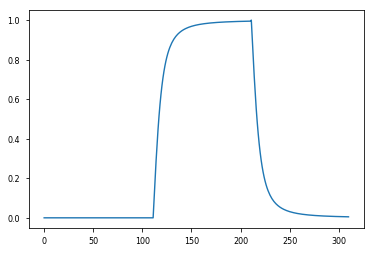

In [10]:
plt.figure()
plt.plot(appendpos)

In [5]:
############################ Train the network ############################

base = np.zeros(200) # wait 300 ms
basenet = [ base for i in range(num_neurons) ]
def train(batch, vec):
    print('.')
    gain = [ np.linspace(0, batch[p][0], 20) for p in range(len(batch)) ]
    gain.append(batch[-1][0:20])
    driv.train(gain, vec) # smooth gain
    driv.train(batch, vec) # correspondence between data and context
    decline = [ np.linspace(batch[p][-1], 0, 20) for p in range(len(batch)) ]
    decline.append(batch[-1][0:20])
    driv.train(decline, ret) # smooth decline
    basenet.append(batch[-1][len(agg):-1])
    driv.train(basenet, ret)
    del basenet[-1]

# In[6]
"""

    TRAIN THE NETWORK
    -----------------

    Train the network for range(ephocs), rearranging
    the order of input stimulus presentation.

"""
start = time.time()
for epoch in range(epochs):
    if epoch == epochs / 4:
        end = time.time()
        print("[ 25%] training complete.", end - start, "seconds ellapsed.")
    if epoch == epochs / 2:
        end = time.time()
        print("[ 50%] training complete.", end - start, "seconds ellapsed.")
    if epoch == 3 * (epochs / 4):
        end = time.time()
        print("[ 75%] training complete.", end - start, "seconds ellapsed.")
    for i in range(len(vecs)):
        if i == len(vecs) / 2: print("Processed 50% of contexts")
        targ = [ agg[k][i] for k in range(len(agg)) ]
        if vecs[i][1]: targ.append(appendpos)
        else: targ.append(appendneg)
        train(targ, vecs[i][0])

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Processed 50% of contexts
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
('[ 25%] training complete.', 3064.544949054718, 'seconds ellapsed.')
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Processed 50% of contexts
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
('[ 50%] training complete.', 6119.334617137909, 'seconds ellapsed.')
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Processed 50% of contexts
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
('[ 75%] training complete.', 9177.232677221298, 'seconds ellapsed.')
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Processed 50% of contexts
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Processed 50% of contexts
.
.
.
.
.
.
.
.


In [25]:
sig = [ [] for i in range(72) ]
targ = [ [] for i in range(72) ]

ICs = []

res = [ [] for i in range(72) ]
#start = time.time()

toshow1 = [ agg[i][0] for i in range(len(agg)) ]
toshow = [driv.neuron[i][20:(len(toshow1[0])+20)] for i in range(num_neurons)]

for t in range(len(vecs)):
    driv.targets = [ [] for i in range(num_neurons) ]
    driv.errors = [ [] for i in range(num_neurons) ]
    driv.neuron = [ [] for i in range(num_neurons) ]
    driv.signal = []
    
    ICs.append((driv.network.membrane_potential, vecs[t][0]))
    test = [ agg[k][t] for k in range(len(agg)) ]
    if vecs[t][1]: test.append(appendpos)
    else: test.append(appendneg)

    gain = [ np.linspace(0, test[p][0], 20) for p in range(len(test)) ]
    gain.append(test[-1][0:20])
    driv.test(gain, vecs[t][0])
    ICs.append((driv.network.membrane_potential, vecs[t][0]))
    
    driv.test(test, vecs[t][0], off=100, twn=True, scale=0.1)
    ICs.append((driv.network.membrane_potential, vecs[t][0]))
    
    drop = [ np.linspace(0, test[t][-1], 20) for p in range(len(test)) ]
    drop.append(test[-1][0:20])
    driv.test(drop, ret, off=len(test[t])+100)
    ICs.append((driv.network.membrane_potential, vecs[t][0]))
    
    driv.test(basenet, ret, off=len(test[t])+200)
    ICs.append((driv.network.membrane_potential, vecs[t][0]))

    res[t] = [ driv.neuron[i] for i in range(num_neurons) ]

In [10]:
print(len(driv.zs), num_neurons)

(727, 727)


In [33]:
np.save('exp_samples_3_29_18', res)
np.save('ics_test_3_29_18', ICs)

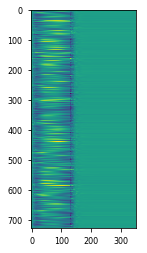

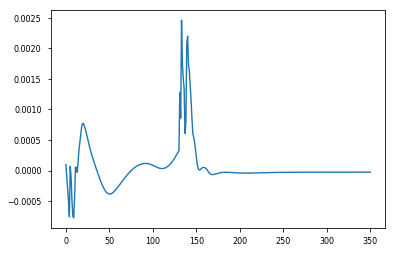

In [41]:
plt.figure()
plt.imshow(res[18])

plt.figure()
plt.plot(res[18][-1])

In [42]:
responses = [res[i][-1] for i in range(len(res))]

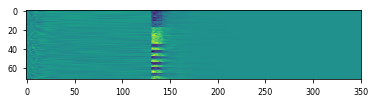

In [43]:
plt.figure()
plt.imshow(responses)

## Experiment 2

The below cells consider a different target function (the only difference is that the target has greater magnitude)

In [44]:
targ = [ 0 for i in range(3000) ]
tests = [ targ for i in range(num_neurons) ]
driv2 = Driver(period, time_constant, num_neurons, p, chaotic_constant,
             input_num, output_num, gg_sparseness, gz_sparseness,
             fg_sparseness, readout_sparseness, g_gz, alpha, dt,
             tests, sigma, target_in_network=True)

Initializing network...
('Time ellapsed in network instantiation: ', 0.18462800979614258)


In [45]:
############################ Organize targets  ############################

def sigmoid5(x):
    return 5 * x / math.sqrt(100 + x * x)

poss_maps = {
    'baseline': [[ 0 for i in range(len(agg[0][0]))           ] for k in range(num_neurons)],
    'pos'     : [[ sigmoid5(i) for i in range(100)            ] for k in range(num_neurons)],
    'neg'     : [[ -1 * sigmoid5(i) for i in range(100)       ] for k in range(num_neurons)],
    'r_pos'   : [[ 1 - sigmoid5(i) for i in range(100)        ] for k in range(num_neurons)],
    'r_neg'   : [[ -1 * (1 - sigmoid5(i)) for i in range(100) ] for k in range(num_neurons)],
    'base'    : [[ 0 for i in range(100)                      ] for k in range(num_neurons)]
}

done = [[ 0 for i in range(300) ] for k in range(input_num)]
done_ = [[ 0.2 for i in range(300) ] for k in range(input_num)]

In [46]:
cc   = [-0.5, -0.17, -0.05, 0.05, 0.17, 0.5] # color coherence values
mc   = [-0.5, -0.17, -0.05, 0.05, 0.17, 0.5] # motion coherence values
vecs = []  # context / coherence vecs
ret = [0, 0, 0, 0, 1]

for i in range(2):
    for j in range(len(cc)):
        for k in range(len(mc)):
            if i == 0: vecs.append((np.array([ cc[j], mc[k], 1, 0, 0 ]), True if cc[j] > 0 else False))
            else: vecs.append((np.array([ cc[j], mc[k], 0, 1, 0 ]), True if mc[k] > 0 else False))

appendpos = np.append(np.append(poss_maps['baseline'][0], poss_maps['pos'][0]), poss_maps['r_pos'][0])
appendneg = np.append(np.append(poss_maps['baseline'][0], poss_maps['neg'][0]), poss_maps['r_neg'][0])

In [47]:
############################ Train the network ############################

base = np.zeros(200) # wait 300 ms
basenet = [ base for i in range(num_neurons) ]
def train(batch, vec):
    print('.')
    gain = [ np.linspace(0, batch[p][0], 20) for p in range(len(batch)) ]
    gain.append(batch[-1][0:20])
    driv2.train(gain, vec) # smooth gain
    driv2.train(batch, vec) # correspondence between data and context
    decline = [ np.linspace(batch[p][-1], 0, 20) for p in range(len(batch)) ]
    decline.append(batch[-1][0:20])
    driv2.train(decline, ret) # smooth decline
    basenet.append(batch[-1][len(agg):-1])
    driv2.train(basenet, ret)
    del basenet[-1]

# In[6]
"""

    TRAIN THE NETWORK
    -----------------

    Train the network for range(ephocs), rearranging
    the order of input stimulus presentation.

"""
start = time.time()
for epoch in range(epochs):
    if epoch == epochs / 4:
        end = time.time()
        print("[ 25%] training complete.", end - start, "seconds ellapsed.")
    if epoch == epochs / 2:
        end = time.time()
        print("[ 50%] training complete.", end - start, "seconds ellapsed.")
    if epoch == 3 * (epochs / 4):
        end = time.time()
        print("[ 75%] training complete.", end - start, "seconds ellapsed.")
    for i in range(len(vecs)):
        if i == len(vecs) / 2: print("Processed 50% of contexts")
        targ = [ agg[k][i] for k in range(len(agg)) ]
        if vecs[i][1]: targ.append(appendpos)
        else: targ.append(appendneg)
        train(targ, vecs[i][0])

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Processed 50% of contexts
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
('[ 25%] training complete.', 3026.7855451107025, 'seconds ellapsed.')
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Processed 50% of contexts
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
('[ 50%] training complete.', 6062.825851917267, 'seconds ellapsed.')
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Processed 50% of contexts
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
('[ 75%] training complete.', 9096.116707086563, 'seconds ellapsed.')
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Processed 50% of contexts
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Processed 50% of contexts
.
.
.
.
.
.
.
.
.

In [48]:
sig2 = [ [] for i in range(72) ]
targ2 = [ [] for i in range(72) ]

ICs2 = []

res2 = [ [] for i in range(72) ]
#start = time.time()

toshow1 = [ agg[i][0] for i in range(len(agg)) ]
toshow = [driv.neuron[i][20:(len(toshow1[0])+20)] for i in range(num_neurons)]

for t in range(len(vecs)):
    driv2.targets = [ [] for i in range(num_neurons) ]
    driv2.errors = [ [] for i in range(num_neurons) ]
    driv2.neuron = [ [] for i in range(num_neurons) ]
    driv2.signal = []
    
    ICs2.append((driv.network.membrane_potential, vecs[t][0]))
    test = [ agg[k][t] for k in range(len(agg)) ]
    if vecs[t][1]: test.append(appendpos)
    else: test.append(appendneg)

    gain = [ np.linspace(0, test[p][0], 20) for p in range(len(test)) ]
    gain.append(test[-1][0:20])
    driv2.test(gain, vecs[t][0])
    ICs2.append((driv.network.membrane_potential, vecs[t][0]))
    
    driv2.test(test, vecs[t][0], off=100, twn=True, scale=0.1)
    ICs2.append((driv.network.membrane_potential, vecs[t][0]))
    
    drop = [ np.linspace(0, test[t][-1], 20) for p in range(len(test)) ]
    drop.append(test[-1][0:20])
    driv2.test(drop, ret, off=len(test[t])+100)
    ICs2.append((driv.network.membrane_potential, vecs[t][0]))
    
    driv2.test(basenet, ret, off=len(test[t])+200)
    ICs2.append((driv.network.membrane_potential, vecs[t][0]))

    res2[t] = [ driv.neuron[i] for i in range(num_neurons) ]

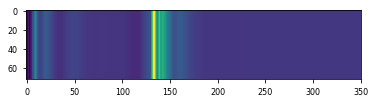

In [49]:
responses2 = [res2[i][-1] for i in range(len(res2))]
plt.figure()
plt.imshow(responses2)

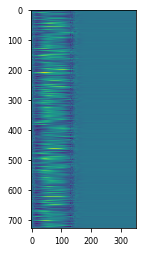

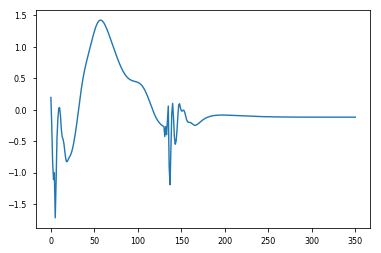

In [54]:
plt.figure()
plt.imshow(res2[18])

plt.figure()
plt.plot(res2[18][0])